# Lab 6: Covariance and longer and wider tables

In [2]:
library(tidyverse)
install.packages("dslabs")
library(dslabs)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 1. Covariance and Correlation

$$Cov(X,Y) = E(XY) - E(X)E(Y)$$
<br>
$$Correlation(X,Y) = \rho_{X,Y} = \frac{Cov(X,Y)}{sd(X)sd(Y)}$$

Couple of rules:
* $Cov(X, X) = var(X)$
* $Cov(X, aY+c) = aCov(X,Y)$ where $X$ and $Y$ are random variables, $a$ and $c$ are constants
* If $X$ and $Y$ are independent than $Cov(X,Y) = 0$
* $Var(aX+c) = a^2 Var(X)$

Example: Let $X$ and $Z$ be independent random variables and let $Y = 2X+Z+5$. What is $\rho_{X, Y}$? (Suppose both $X$ and $Z$ are coming from $N(0,1)$).

#### Theoretical solution:
$$Cov(X, Y) = Cov(X, 2X+Z+5) = Cov(X, 2X)+Cov(X,Z)+Cov(X+5) = Cov(X,2X) = 2Var(X) = 2$$
<br>
$$Var(Y) = Var(2X+Z+5) = 4Var(X) + Var(Z) = 5$$
<br>
$$\rho_{X, Y} = \frac{Cov(X, Y)}{sd(X)sd(Y)} = \frac{2Var(X)}{sd(X)sd(Y)} = \frac{2}{\sqrt{5}} = 0.89 $$

#### Empirical solution:

In [3]:
set.seed(108)

n = 100000
X = rnorm(n)
Z = rnorm(n)
Y = 2*X + Z + 5

cor(X,Y)

[1] 0.8946458

#### In real data, we can usually only find the empirical solution--most of the time we do not know the underlying distribution.

In [7]:
gapminder %>% filter(year == 2011) %>% group_by(continent) %>% 
summarise(rho = cor(infant_mortality, life_expectancy))

continent rho       
1 Africa    -0.6300899
2 Americas          NA
3 Asia              NA
4 Europe    -0.6746311
5 Oceania           NA

In [6]:
?cor

#### Exercise 1: Why there are `NA`'s for some continents? How can you correct that?

In [8]:
gapminder %>% filter(year == 2011) %>% group_by(continent) %>% 
drop_na(infant_mortality, life_expectancy) %>% 
summarise(rho = cor(infant_mortality, life_expectancy))

continent rho       
1 Africa    -0.6300899
2 Americas  -0.7876818
3 Asia      -0.8319735
4 Europe    -0.6746311
5 Oceania   -0.8656749

## 1 Longer and Wider tables

In [9]:
grades_wide = tribble(
  ~name, ~Sex, ~`2015`, ~`2016`, ~`2017`,
     'Wu',  'M', 83,      89,      93,
  'Alice',  'F', 92,      90,      93,
 'Jordan',   NA, 80,      87,      99,
 'Gilberto','M', 67,      90,      92)
grades_wide

name     Sex 2015 2016 2017
1 Wu       M   83   89   93  
2 Alice    F   92   90   93  
3 Jordan   NA  80   87   99  
4 Gilberto M   67   90   92

In [10]:
grades_long = grades_wide %>% 
pivot_longer(-c(name, Sex), names_to = "year", values_to = "grades")
grades_long

name     Sex year grades
1  Wu       M   2015 83    
2  Wu       M   2016 89    
3  Wu       M   2017 93    
4  Alice    F   2015 92    
5  Alice    F   2016 90    
6  Alice    F   2017 93    
7  Jordan   NA  2015 80    
8  Jordan   NA  2016 87    
9  Jordan   NA  2017 99    
10 Gilberto M   2015 67    
11 Gilberto M   2016 90    
12 Gilberto M   2017 92

In [11]:
grades_long %>%  pivot_wider(names_from = year, values_from = grades)

name     Sex 2015 2016 2017
1 Wu       M   83   89   93  
2 Alice    F   92   90   93  
3 Jordan   NA  80   87   99  
4 Gilberto M   67   90   92

## MLB dataset

In [14]:
mlb = read_csv('https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab5/mlb.csv')
mlb %>% head


── Column specification ────────────────────────────────────────────────────────
cols(
  year = col_double(),
  name = col_character(),
  team = col_character(),
  division = col_character(),
  PA = col_double(),
  HR = col_double(),
  BBrate = col_character(),
  BB_K = col_character(),
  AVG = col_double(),
  FB = col_double(),
  playerid = col_double()
)




year name            team    division PA  HR BBrate BB_K  AVG   FB playerid
1 2016 Abraham Almonte Indians Central  194 1  4.1 %  8/42  0.264 43  5486   
2 2017 Abraham Almonte Indians Central  195 3  10.3 % 20/46 0.233 34  5486   
3 2015 Adam Moore      Indians Central    4 0  0.0 %  0/2   0.250  1  9362   
4 2016 Adam Moore      Indians Central    5 0  0.0 %  0/4   0.000  1  9362   
5 2018 Adam Plutko     Indians Central    2 0  0.0 %  0/0   0.000  0 15846   
6 2018 Adam Rosales    Indians Central   21 1  4.8 %  1/5   0.211  7  9682

#### Exercise 2: Calculate the `Home Run to Fly Ball rate (HR/FB)` in total for each team and year. That is $HR\_FB = \frac{\sum HR_i}{\sum FB_i}$. Make sure you have the division at the final dataset. So  you'll have `division`, `team`, `year` and `HR_FB`.

In [15]:
df = mlb %>% group_by(division, team, year) %>% summarize(HR_FB=sum(HR)/sum(FB))
head(df)

`summarise()` has grouped output by 'division', 'team'. You can override using the `.groups` argument.



division team    year HR_FB     
1 Central  Indians 2015 0.09964727
2 Central  Indians 2016 0.11984021
3 Central  Indians 2017 0.13141026
4 Central  Indians 2018 0.12936849
5 Central  Royals  2015 0.08997253
6 Central  Royals  2016 0.10412148

 #### Exercise 3: Convert this to a wide dataset, so your variables should be `division`, `team`, and `2015-2018`, where values are the `HR/FB` rate. Note that, again, you should ensure that `division` is still in the dataset.

In [16]:
df_wide = df %>% pivot_wider(names_from = year, values_from = HR_FB)
head(df_wide)

division team      2015       2016      2017      2018      
1 Central  Indians   0.09964727 0.1198402 0.1314103 0.12936849
2 Central  Royals    0.08997253 0.1041215 0.1225681 0.10319635
3 Central  Tigers    0.09611152 0.1376147 0.1077051 0.09244314
4 Central  Twins     0.10641201 0.1308677 0.1312420 0.09869494
5 Central  White_Sox 0.10594947 0.1220799 0.1352785 0.13573620
6 East     Blue_Jays 0.16168582 0.1460446 0.1417910 0.13721264

 #### Exercise 4: Create a variable called `increased`, which checks if the `HR/FB` rate was higher in 2018 than it was in 2015 for that team.

In [17]:
df_wide = df_wide %>% mutate(increased = `2018`>`2015`)
head(df_wide, 15)

division team      2015       2016      2017      2018       increased
1  Central  Indians   0.09964727 0.1198402 0.1314103 0.12936849  TRUE    
2  Central  Royals    0.08997253 0.1041215 0.1225681 0.10319635  TRUE    
3  Central  Tigers    0.09611152 0.1376147 0.1077051 0.09244314 FALSE    
4  Central  Twins     0.10641201 0.1308677 0.1312420 0.09869494 FALSE    
5  Central  White_Sox 0.10594947 0.1220799 0.1352785 0.13573620  TRUE    
6  East     Blue_Jays 0.16168582 0.1460446 0.1417910 0.13721264 FALSE    
7  East     Orioles   0.14992722 0.1571610 0.1524138 0.12285714 FALSE    
8  East     Rays      0.11355311 0.1395179 0.1588862 0.10292634 FALSE    
9  East     Red_Sox   0.11068111 0.1353482 0.1067762 0.13297872  TRUE    
10 East     Yankees   0.12690665 0.1190476 0.1556157 0.16188525  TRUE    
11 West     Angels    0.12264151 0.1029900 0.1278079 0.14545455  TRUE    
12 West     Astros    0.14814815 0.1432814 0.1433869 0.12697410 FALSE    
13 West     Athletics 0.08695652 0.1151920 0.1479150 0.13774272  TRUE    
14 West     Mariners  0.13852459 0.1563611 0.1294278 0.12296296 FALSE    
15 West     Rangers   0.11508220 0.1407579 0.1682379 0.14190687  TRUE

#### Exercise 5: Calculate the correlation between each year with the following year. That is $\rho_{2015, 2016}, \rho_{2016, 2017}, \rho_{2017, 2018}$

In [22]:
df_wide %>% ungroup %>%
summarise(`2015-2016` = cor(`2015`, `2016`),
          `2016-2017` = cor(`2016`, `2017`),
          `2017-2018` = cor(`2017`, `2018`))

2015-2016 2016-2017 2017-2018
1 0.6381773 0.2025801 0.3866467

#### Exercise 6: Turn `df_wide` back into a "long" dataset

In [23]:
df_long = df_wide %>% 
pivot_longer(`2015`:`2018`, names_to = "year", values_to = "HR_FB")
head(df_long)

division team    increased year HR_FB     
1 Central  Indians TRUE      2015 0.09964727
2 Central  Indians TRUE      2016 0.11984021
3 Central  Indians TRUE      2017 0.13141026
4 Central  Indians TRUE      2018 0.12936849
5 Central  Royals  TRUE      2015 0.08997253
6 Central  Royals  TRUE      2016 0.10412148

#### Exercise 7: Using df_long, create a faceted line plot of `HR/FB` rate on `year`. Color it by `team`, facet it by `division`, and choose the linetype according to the `increased` variable.

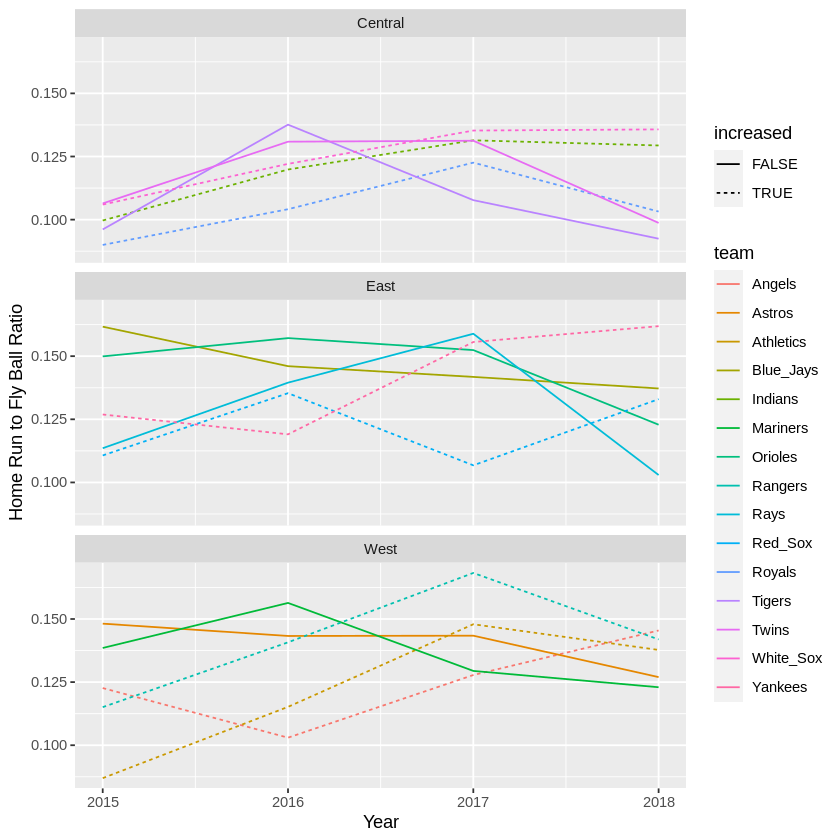

In [24]:
ggplot(df_long, aes(color=team, linetype=increased, x=as.integer(year), y=HR_FB)) + 
    geom_line() + xlab("Year") + ylab("Home Run to Fly Ball Ratio") + 
    facet_wrap(~ division, nrow=3)